## Boston Entertainment License

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import seaborn as sns
import seaborn.matrix as smatrix
sns.set(style="ticks") 


In [2]:
filename = "https://data.boston.gov/dataset/0d93d762-da11-4cea-9bf0-77aaa5d25c36/resource/7920c501-b410-4a9c-85ab-51338c9b34af/download/entertainment-licenses.csv"
# headers = ["symboling","normalized-losses","make"]
df = pd.read_csv(filename,header=0,mangle_dupe_cols=True,skip_blank_lines=True,dtype ='unicode',parse_dates=True)

In [3]:
df.head(n = 3)

,LICENSENO,LICENSEDTTM,ISSDTTM,EXPDTTM,LICSTATUS,LICCATDESC,PRIMAPPLICANT,CONTACT,DBANAME,BUSINESSNAME,...,CAL_UNITTYPECODE,UnitTypeDescript,TotalEntCapacity,STNO,STNOHI,Address,CITY,STATE,ZIP,Location
0,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,WidescrnTV,Widescreen Television,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
1,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,Radio,Radio,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"
2,CAL-132180,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Stephen Pole,NaN,Club Hotel by Double Tree,"Bayside Club Hotel, LLC",...,CassetteCD,Cassette/CD Player,70,240,NaN,Mount Vernon ST,Dorchester,MA,2125,"(42.319024000, -71.045007000)"


In [4]:
print("The dimensions of the food inspection data set are: {}".format(df.shape))
print("The size of the food inspection data set is : {} " .format(df.size))
Data1=df.astype('category')


The dimensions of the food inspection data set are: (5223, 28)
The size of the food inspection data set is : 146244 


In [5]:
Data1.describe()


,LICENSENO,LICENSEDTTM,ISSDTTM,EXPDTTM,LICSTATUS,LICCATDESC,PRIMAPPLICANT,CONTACT,DBANAME,BUSINESSNAME,...,CAL_UNITTYPECODE,UnitTypeDescript,TotalEntCapacity,STNO,STNOHI,Address,CITY,STATE,ZIP,Location
count,5223,5215,5219,5219,5223,5223,5223,594,5223,5221,...,5222,5221,5223,5175,2048,5223,5223,5223,5223,4557
unique,1302,94,35,3,1,3,1130,130,1216,1185,...,25,24,425,649,358,341,20,3,32,1029
top,CAL-132387,1/1/2014 0:00,9/12/2014 17:24,12/31/2015 0:00,Active,Non-Live Entertainment,Douglas Bacon,LEE,Boloco,"Legal Sea Foods, LLC",...,CassetteCD,Cassette/CD Player,99,1,299,Washington ST,Boston,MA,2116,"(42.346219000, -71.043099000)"
freq,13,4888,5137,4979,5223,2513,33,19,21,37,...,952,952,110,162,33,240,3116,5189,730,24


In [6]:
missing_data = df.isnull()
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data
print(missing_data)


                        Total    Percent
CONTACT                  4629  88.627226
STNOHI                   3175  60.788819
Location                  666  12.751292
ENDTIME                   148   2.833621
STNO                       48   0.919012
LICENSEDTTM                 8   0.153169
ISSDTTM                     4   0.076584
EXPDTTM                     4   0.076584
Manager                     3   0.057438
UnitTypeDescript            2   0.038292
BUSINESSNAME                2   0.038292
CAL_UNITTYPECODE            1   0.019146
FEEAMOUNT                   1   0.019146
LICCATDESC                  0   0.000000
PRIMAPPLICANT               0   0.000000
LICSTATUS                   0   0.000000
DBANAME                     0   0.000000
CAPACITY                    0   0.000000
TOTALCAPACITY               0   0.000000
ZIP                         0   0.000000
NUMBEROFUNITS               0   0.000000
Neighborhood                0   0.000000
CAL_POLICEDISTRICTCODE      0   0.000000
TotalEntCapacity

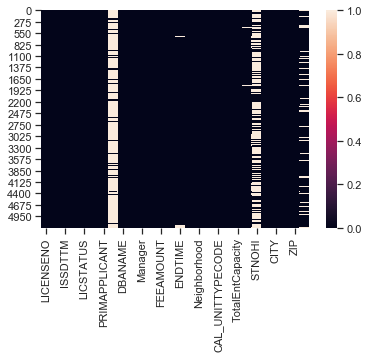

In [7]:
sns.heatmap(df.isnull())

In [8]:
df = df.drop(columns = ['DBANAME', 'CONTACT','STATE','STNOHI','Address','Location'])   
df.rename(columns = {'city': 'neighborhood'}, inplace = True)
print(list(df))

['LICENSENO', 'LICENSEDTTM', 'ISSDTTM', 'EXPDTTM', 'LICSTATUS', 'LICCATDESC', 'PRIMAPPLICANT', 'BUSINESSNAME', 'Manager', 'TOTALCAPACITY', 'FEEAMOUNT', 'CAPACITY', 'ENDTIME', 'NUMBEROFUNITS', 'Neighborhood', 'CAL_POLICEDISTRICTCODE', 'CAL_UNITTYPECODE', 'UnitTypeDescript', 'TotalEntCapacity', 'STNO', 'CITY', 'ZIP']


In [9]:
# There is only one row with no business name in it, we will remove that row
df = df.dropna(subset=['BUSINESSNAME'])
len(df)

5221

In [10]:
df["BUSINESSNAME"] = df['BUSINESSNAME'].str.lower()


In [11]:
df['LICENSEDTTM'] = pd.to_datetime(df['LICENSEDTTM'])

In [12]:
# converting total capacity to Integer
df['TOTALCAPACITY'] = df['TOTALCAPACITY'].astype(int)
df['FEEAMOUNT'] = df['FEEAMOUNT'].astype(float)

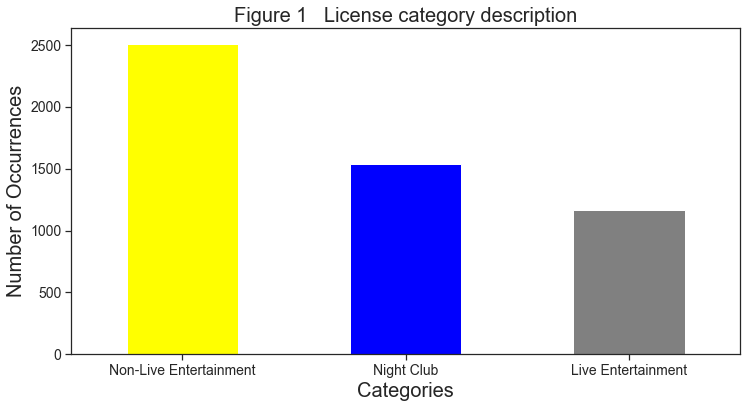

In [13]:
ax = df['LICCATDESC'].value_counts().head(3).plot.bar(

    figsize = (12,6),
    fontsize = 14,
    color={"blue","gray","yellow"},
    rot=0
)
ax.set_title("Figure 1   License category description", fontsize = 20)
ax.set_xlabel("Categories", fontsize = 20)
ax.set_ylabel("Number of Occurrences", fontsize = 20)
plt.show()

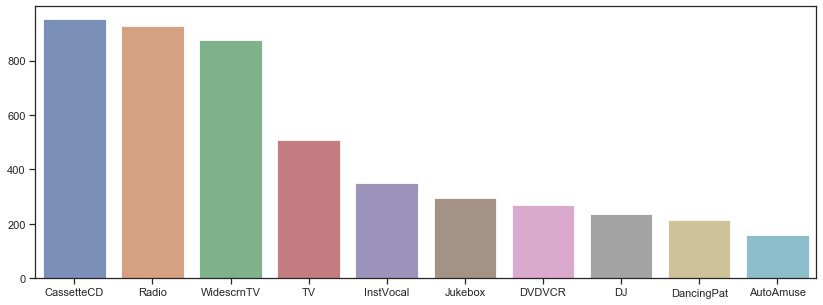

In [14]:

result_count  = df['CAL_UNITTYPECODE'].value_counts()
result_count = result_count[:10,]
plt.figure(figsize=(14,5))
sns.barplot(result_count.index, result_count.values, alpha=0.8)

plt.show()

In [15]:
capacity = df[['BUSINESSNAME','TOTALCAPACITY']].groupby('BUSINESSNAME')['TOTALCAPACITY'].mean().round(decimals=0).reset_index().sort_values('TOTALCAPACITY', ascending=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

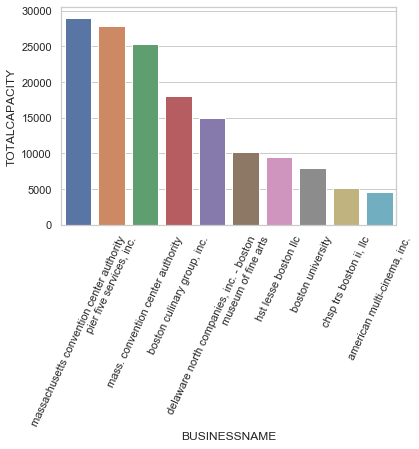

In [30]:
sns.barplot(x='BUSINESSNAME', y='TOTALCAPACITY', data=capacity.head(10))
plt.xticks(rotation=65)

In [17]:
endtime = df['ENDTIME'].value_counts()
endtime

2:00 AM           2391
1:00 AM           1141
11:00 PM           415
12:00 AM           395
10:00 PM           115
02:00am             95
11:30 PM            40
12:30 AM            40
9:00 PM             38
8:00 PM             27
01:00am             27
7:00 PM             26
1:30 AM             24
see below           22
10:30 PM            21
10:00pm             16
11:00pm             16
SEE BELOW           14
2:00am              13
4:00 PM             12
6:00 PM              9
1:00AM               8
11:00PM              8
12:30am              8
02:00AM*             8
10:00PM              8
2:00AM               8
1:00am               7
2:00 AM*             7
See Conditions       7
                  ... 
07:00pm              5
24 Hours             4
10:30pm              4
11:30 PM*            4
1:30am               4
See below            4
01:00AM              4
01:00am*             4
8:00PM               3
**                   3
2:00 AM **           3
7:00PM               3
9:00PM     

In [18]:
# Number of Violations per Restaurant, by Neighborhood
hood = df.groupby('Neighborhood')['LICENSENO'].nunique().sort_values(ascending = False)
hood = pd.DataFrame({'Neighborhood':hood.index, 'BusinessCount':hood.values})
hood.head(n=10)

,Neighborhood,BusinessCount
0,Downtown/Charlestown/North End,455
1,Back Bay/South End,296
2,Allston/Brighton,142
3,East Boston,110
4,South Boston,103
5,Dorchester,48
6,West Roxbury/Roslindale,43
7,Jamaica Plain,42
8,Roxbury/Dorchester,29
9,Hyde Park,18


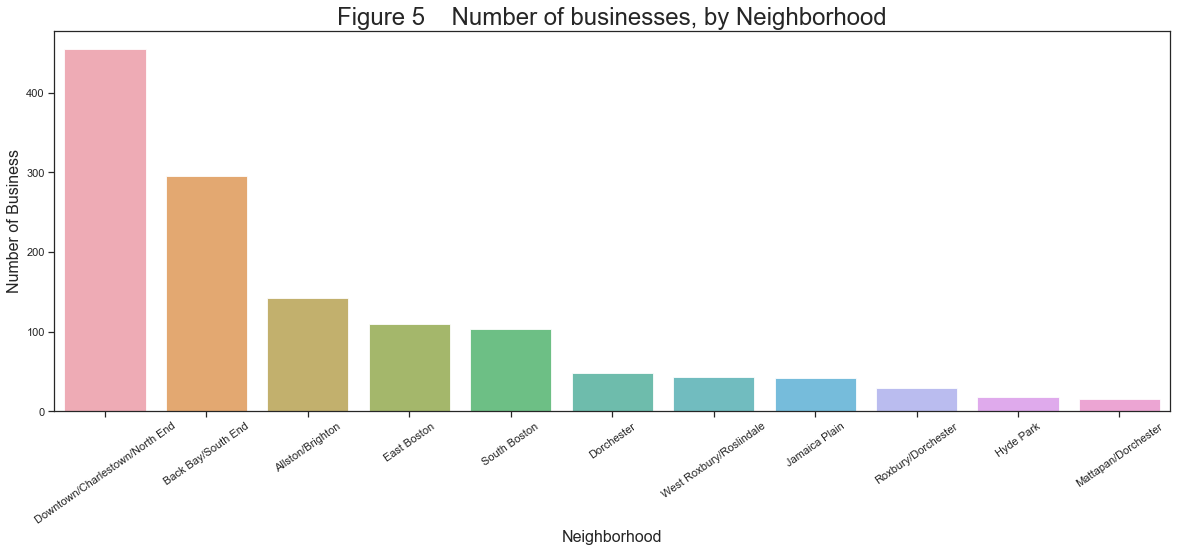

In [19]:

plt.figure(figsize=(20,7))
sns.barplot(hood.Neighborhood, hood.BusinessCount, alpha=0.8)
plt.title('Figure 5    Number of businesses, by Neighborhood', fontsize = 24)
plt.ylabel('Number of Business',fontsize=16)
plt.xlabel('Neighborhood', fontsize=16)
plt.xticks(rotation=35)
plt.show()

In [20]:
A = df[df["LICCATDESC"] == "Non-Live Entertainment"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
NLE = np.log(A)
B = df[df["LICCATDESC"] == "Night Club"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
NC = np.log(B)
C = df[df["LICCATDESC"] ==  "Live Entertainment"].groupby('LICENSENO')['LICENSENO'].count().sort_values(ascending=False)
LE = np.log(C)

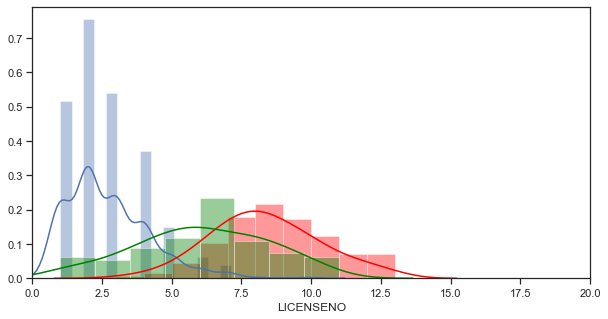

In [21]:
# Raw distribution of counts is highly skewed 
plt.figure(figsize=(10,5))
plt.xlim(0,20)
sns.distplot(A)
sns.distplot(B, color='red')
sns.distplot(C, color='green')
plt.show()

In [22]:
L_count = pd.DataFrame(df.groupby(df.LICENSEDTTM.dt.year)['LICENSENO'].count())

In [23]:
L_count.colunms = (['Year', 'Licenses Provided'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [24]:
L_count = L_count.reset_index()

In [25]:
L_count

,LICENSEDTTM,LICENSENO
0,2013.0,30
1,2014.0,5161
2,2015.0,22


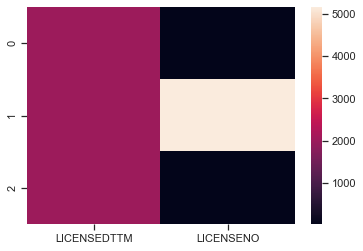

In [26]:
sns.heatmap(L_count)

### costly business

In [27]:
#BUSINESSNAME FEEAMOUNT
costly_bus = df[['BUSINESSNAME', 'FEEAMOUNT']].groupby('BUSINESSNAME')['FEEAMOUNT'].mean().reset_index().sort_values('FEEAMOUNT', ascending=False).head(10)
cheap_bus = df[['BUSINESSNAME', 'FEEAMOUNT']].groupby('BUSINESSNAME')['FEEAMOUNT'].mean().reset_index().sort_values('FEEAMOUNT', ascending=True).head(10)

In [28]:
costly_bus

,BUSINESSNAME,FEEAMOUNT
333,"delaware north companies, inc. - boston",5577.142857
895,rowes wharf limited partnership,4912.000000
862,"regal cinema's, inc.",2773.333333
413,"first boston tenpin, inc.",2692.000000
68,"american multi-cinema, inc.",2268.000000
734,new england conservatory of music,1600.000000
960,"south boston candlepins, inc.",1420.000000
867,"remy's fenway group, llc",1402.857143
348,do re mi studios,1346.666667
1030,"tavern in the square causeway street, llc",1320.000000


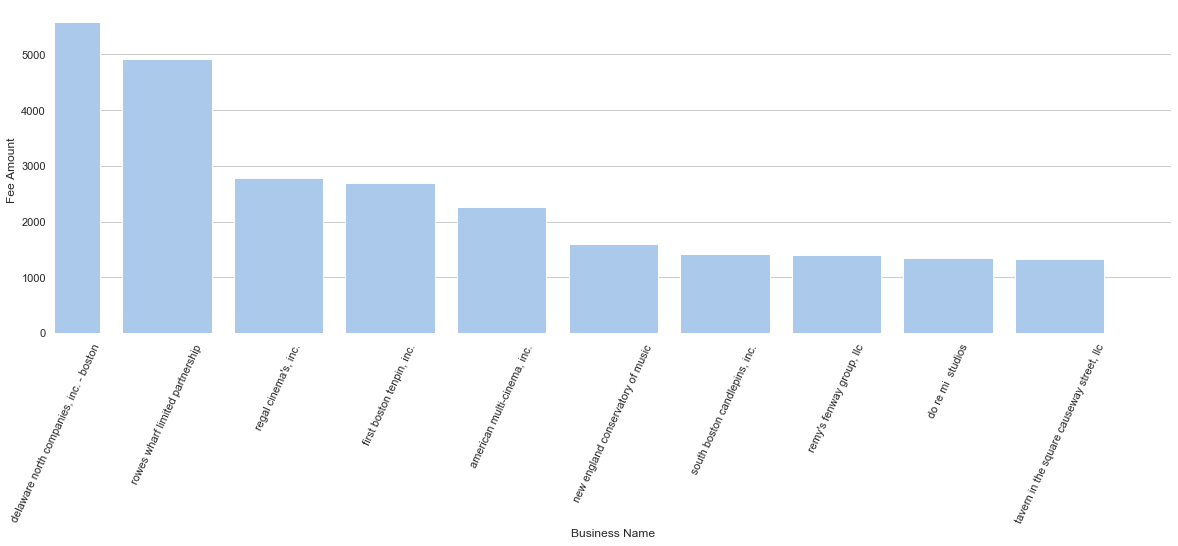

In [29]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 6))
sns.set_color_codes("pastel")
sns.barplot(x="BUSINESSNAME", y="FEEAMOUNT", data=costly_bus,
            label="Costly Businesses", color="b")
plt.xticks(rotation=65)
ax.set(xlim=(0, 10), ylabel="Fee Amount",
       xlabel="Business Name")
sns.despine(left=True, bottom=True)